# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r"C:\Users\Sam\Desktop\CF\Project 4 Instacart Basket\Instacart Basket Analysis\02 Data\Prepared Data"

In [3]:
df=pd.read_pickle(os.path.join(path,"Df_final.pkl"))

In [4]:
#checking for execution
df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,median_days_between_orders,order_frequency,region,exclusion_flag,income_group,age_group,dependent,dependent_flag,customer_profile,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,19.0,Regular customer,Midwest,False,high income,Working-age adult,3.0,with dependents,married Working-age adult high income with dep...,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,19.0,Regular customer,Midwest,False,high income,Working-age adult,3.0,with dependents,married Working-age adult high income with dep...,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,19.0,Regular customer,Midwest,False,high income,Working-age adult,3.0,with dependents,married Working-age adult high income with dep...,beverages
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,19.0,Regular customer,Midwest,False,high income,Working-age adult,3.0,with dependents,married Working-age adult high income with dep...,produce
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,19.0,Regular customer,Midwest,False,high income,Working-age adult,3.0,with dependents,married Working-age adult high income with dep...,produce


In [5]:
df.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_between_orders', 'order_frequency',
       'region', 'exclusion_flag', 'income_group', 'age_group', 'dependent',
       'dependent_flag', 'customer_profile', 'department'],
      dtype='object')

In [6]:
df["department"].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
other                34411
bulk                 33451
Name: count, dtype: int64

In [25]:
#grouping department and loyalty flag
loyal_dept_group = df.groupby(['department', 'loyalty_flag']).size().unstack()

In [26]:
#sorting groupped 
loyal_dept_group = loyal_dept_group.sort_values(by = 'Regular customer', ascending = False)

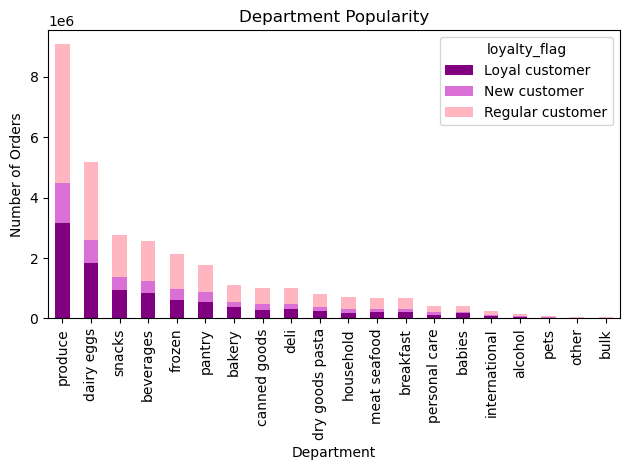

In [27]:
#creating a bar chart
colors = ['purple', 'orchid','lightpink']
loyal_dept_group = loyal_dept_group.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [28]:
#exporting the bar chart
path1=r"C:\Users\Sam\Desktop\CF\Project 4 Instacart Basket\Instacart Basket Analysis\04 Analysis\Visualizations"

In [29]:
loyal_dept_group.figure.savefig(os.path.join(path1,"department_loyalty.png"))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [34]:
# getting columns
df.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_between_orders', 'order_frequency',
       'region', 'exclusion_flag', 'income_group', 'age_group', 'dependent',
       'dependent_flag', 'customer_profile', 'department'],
      dtype='object')

In [53]:
aggregate=df.groupby(["order_frequency","spending_flag"]).agg({"customer_profile":["count"]})

In [54]:
aggregate

customer_profile
                                               count
order_frequency       spending_flag                 
Frequent customer     High spender             51169
                      Low spender           21153307
Non-frequent customer High spender             18263
                      Low spender            2876712
Regular customer      High spender             28011
                      Low spender            6837102

Text(0, 0.5, 'Number of Orders')

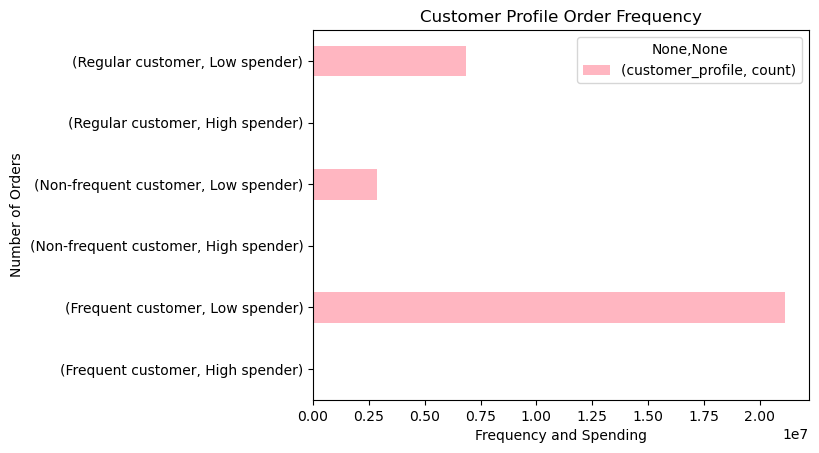

In [63]:
#creating a bar chart
aggregated = aggregate.plot(kind = 'barh', color = "lightpink")
plt.title('Customer Profile Order Frequency')
plt.xlabel('Frequency and Spending')
plt.ylabel('Number of Orders')

In [62]:
#saving the chart
aggregated.figure.savefig(os.path.join(path1,"aggregated profile and spending.png"))

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? 

In [78]:
#grouping by 
dept_profile_region=df.groupby(["department","region"]).agg({"customer_profile":["count"]})

In [79]:
#checking the results
dept_profile_region

customer_profile
                                count
department region                    
alcohol    Midwest              34043
           Northeast            25017
           South                48813
           West                 36754
babies     Midwest              95741
...                               ...
produce    West               2324678
snacks     Midwest             645143
           Northeast           493154
           South               916780
           West                711329

[80 rows x 1 columns]

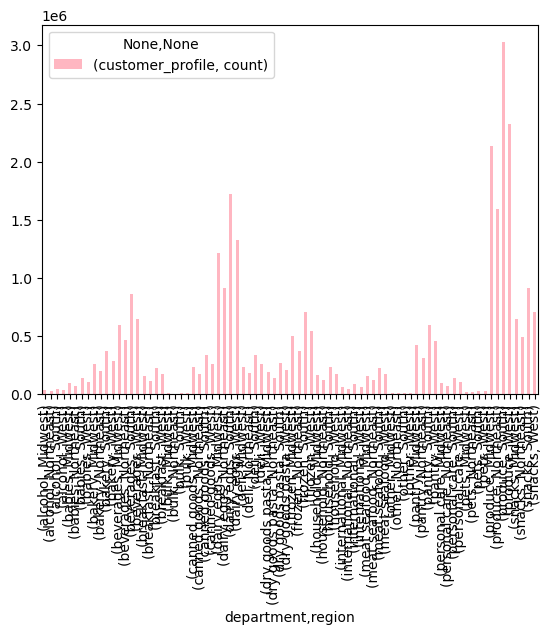

In [80]:
#creating a bar chart
dept_profile_regions = dept_profile_region.plot(kind = 'bar', color = "lightpink")

In [81]:
#exporting the data into a csv file for further amalysis
dept_profile_region.to_csv(os.path.join(path,"department_region_profile.csv"))

### Top 5 Departments

In [83]:
#getting value count
department_counts=df["department"].value_counts()

In [84]:
#getting top 5 values
top_5_depts=department_counts.head(5)

In [85]:
#checkig results
top_5_depts

department
produce       9079273
dairy eggs    5177182
snacks        2766406
beverages     2571901
frozen        2121731
Name: count, dtype: int64

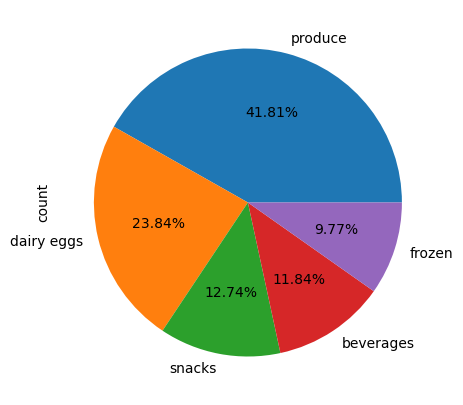

In [87]:
#creating a pie chart for top five departments
dept_pie=top_5_depts.plot(kind="pie",figsize=(5, 5),autopct='%.2f%%')

In [88]:
# saving the pie chart
dept_pie.figure.savefig(os.path.join(path1,"top_five_depts_pie.png"))

# Will exlpore the data for behavior across regions in the top 5 departments for any identifiable links in excel

In [89]:
#exporting final data 
df.to_pickle(os.path.join(path,"df_final_done.pkl"))